# Proyecto 1. Predecir la calidad del vino

## Integrantes:
Daniel Enrique Granados Iglesias

# 1. Importación de paquetes

In [2]:
# Importar Matplotlib y Seaborn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Importar Pandas y NumPy.
import pandas as pd
import numpy as np
!pip show openpyxl

# Importar Warnings
import warnings
warnings.filterwarnings('ignore')

Name: openpyxl
Version: 3.1.2
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages
Requires: et-xmlfile
Required-by: 


In [13]:
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# 2. Lectura de los datos

In [5]:
datos = pd.read_excel('winequality-red.xlsx')

# 3. Análisis preliminar de los datos

El conjunto de datos a analizar corresponde a una muestra de vino tinto del norte de Portugal. El objetivo es modelar la calidad del vino a partir de pruebas fisicoquímicas, y las variables que se utilizan para esto son:
   
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol

A continuación, un análisis preliminar de los datos:

In [8]:
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
print('El número de filas del set de datos es: ', datos.shape[0])
print('Se tiene un total de ', datos.shape[1], ' variables')

El número de filas del set de datos es:  1599
Se tiene un total de  12  variables


In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Como observamos, todas las variables son de tipo float o decimal, mientras que la variable 'quality' es de tipo int o entero. No se observan valores nulos en el set.

De igual forma, vale la pena visualizar un resumen estadístico descriptivo de las variables de análisis, como sigue:

In [12]:
datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1.599000e+03,1599.000000
mean,8.319637,3.879687,0.270976,2.538806,0.087467,15.874922,46.467792,1257.356925,3.311113,0.658149,1.455285e+12,5.636023
std,1.741096,60.015370,0.194801,1.409928,0.047065,10.460157,32.895324,9784.883345,0.154386,0.169507,3.370300e+13,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000e+00,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000e+00,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,1.020000e+01,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,1.110000e+01,6.000000
max,15.900000,1185.000000,1.000000,15.500000,0.611000,72.000000,289.000000,100369.000000,4.010000,2.000000,9.566667e+14,8.000000


# 4. Modelo de regresión lineal múltiple

## 4.1. División de los datos

Inicialmente, dividimos los datos en variables predictoras 'X', y variable de respuesta 'y', como sigue:

In [60]:
X = datos.drop(columns=['quality'])
y = datos['quality']

Como utilizaremos el paquete statsmodel, se hace necesario agregar al set de variables independientes una constante asociada al intercepto, como sigue:

In [61]:
X = sm.add_constant(X)

Finalmente, dividimos los datos en entrenamiento (80%) y prueba (20%), como sigue:

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

## 4.2. Ajuste del modelo

In [64]:
modelo = sm.OLS(y_train, X_train).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     29.22
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.54e-46
Time:                        16:21:07   Log-Likelihood:                -1419.5
No. Observations:                1279   AIC:                             2859.
Df Residuals:                    1269   BIC:                             2911.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3772 

Tal y como observamos, el modelo es bastante pobre. En particular, se tiene un R cuadrado ajustado de 0.166, un valor muy bajo que indica que la variabilidad de la calidad del vino es bajamente explicada por la influencia de las variables predictoras seleccionadas.

Por otra parte, observamos que las variables 'residual sugar', 'density' y 'alcohol' no son significativas, puesto que los p-values obtenidos en las pruebas de significancia marginales de los parámetros, son superiores a 0.05. Lo cual indica que los valores de los Betas son estadísticamente iguales a cero.

Si volviéramos a ajustar el modelo eliminando a estas variables, tendríamos lo siguiente:

In [74]:
X = datos.drop(columns=['quality', 'residual sugar', 'density', 'alcohol'])
X = sm.add_constant(X)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [76]:
modelo = sm.OLS(y_train, X_train).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     42.34
Date:                Sat, 04 May 2024   Prob (F-statistic):           2.61e-60
Time:                        16:26:22   Log-Likelihood:                -1388.7
No. Observations:                1279   AIC:                             2795.
Df Residuals:                    1270   BIC:                             2842.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8139 

Ahora observamos que la variable 'pH' pasa a ser no significativa, al tener un p-value demasiado alto (0.58). Luego, reajustando el modelo, tenemos:

In [77]:
X = datos.drop(columns=['quality', 'residual sugar', 'density', 'alcohol', 'pH'])
X = sm.add_constant(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [79]:
modelo = sm.OLS(y_train, X_train).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     48.37
Date:                Sat, 04 May 2024   Prob (F-statistic):           4.16e-61
Time:                        16:27:34   Log-Likelihood:                -1388.9
No. Observations:                1279   AIC:                             2794.
Df Residuals:                    1271   BIC:                             2835.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.4165 

Observamos que el R2 ajustado mejoró un poco, sin embargo, sigue siendo bastante bajo. En particular, se recomienda utilizar métodos exhaustivos e iterativos de selección de variables como el método forward o el método backward. En este caso, trabajaremos con las variables del último modelo ajustado.

## 4.3. Validación del rendimiento del modelo

Previamente analizamos el R2 ajustado del modelo, obteniendo el siguiente valor:

In [80]:
r2_ajustado = modelo.rsquared_adj

print("R² ajustado:", r2_ajustado)

R² ajustado: 0.20601118228655957


A continuación, procederemos a calcular el MSE y RMSE del modelo tanto para la muestra de train como para la muestra de train como sigue:

In [81]:
from sklearn.metrics import mean_squared_error

In [83]:
### Muestra de train
y_pred = modelo.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = mse**(1/2)
print("MSE en el conjunto de entrenamiento:", mse)
print("RMSE en el conjunto de entrenamiento:", rmse)

MSE en el conjunto de entrenamiento: 0.5137338492826374
RMSE en el conjunto de entrenamiento: 0.7167522928338893


In [84]:
### Muestra de test
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(1/2)
print("MSE en el conjunto de prueba:", mse)
print("RMSE en el conjunto de prueba:", rmse)

MSE en el conjunto de prueba: 0.5194372960051794
RMSE en el conjunto de prueba: 0.7207199844635775


Vamos que, en general, los resultados son bastante similares. Sería conveniente comparar este RMSE con el de otros modelos de regresión como Random Forest Regressor o XGBoost Regressor.

## 4.4. Validación de los supuestos del modelo

Inicialmente, calculamos los residuos como sigue:

In [85]:
residuos = modelo.resid
valores_ajustados = modelo.fittedvalues

### 4.4.1. Supuesto de normalidad

In [86]:
# Prueba Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print("Shapiro-Wilk valor p:", shapiro_test.pvalue)

Shapiro-Wilk valor p: 1.9616043573478237e-05


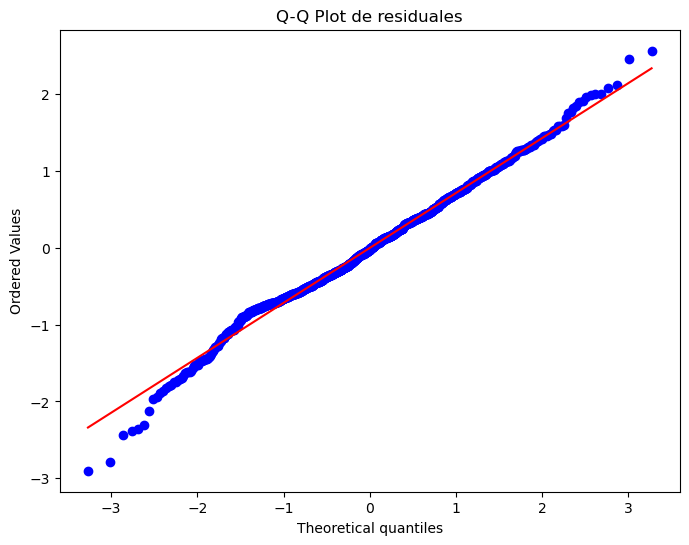

In [87]:
# Gráfico Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de residuales')
plt.show()

Dado que el valor p obtenido en la prueba de Shapiro-Wilk es menor que 0.05, se rechaza la hipótesus nula de que los residuos del modelo están normalmente distribuidos.

Esto coincide con el hecho de que en el gráfico Q-Q Plot, los puntos no se ajustan perfectamente a la línea recta de color rojo.

En conclusión, este primer supuesto no se cumple.

### 4.4.2. Homocedasticidad

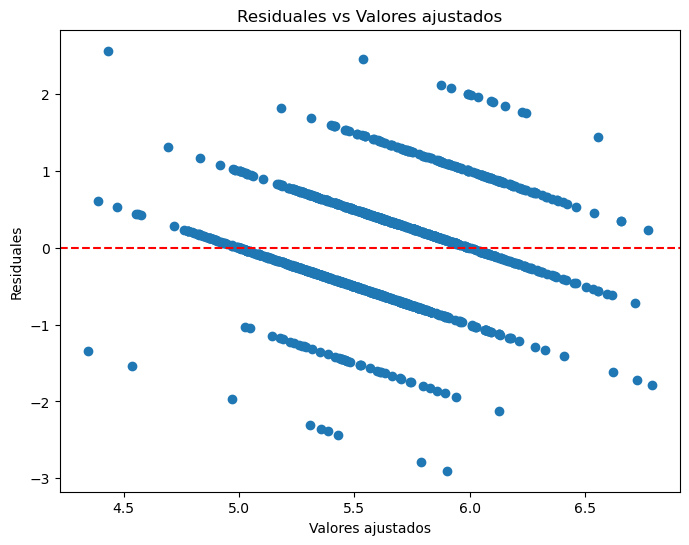

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(valores_ajustados, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuales vs Valores ajustados')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuales')
plt.show()

Como observamos, los puntos del gráfico siguen un patrón de agrupaciones, y muchos están alejados del valor de cero. Esto también sugiere que el supuesto de homocedasaticidad no se está cumpliendo y los residuos, en cambio, son heterocedásticos.

### 4.4.3. Supuesto de independencia

In [89]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test = durbin_watson(residuos)
print("Durbin-Watson test:", durbin_watson_test)

Durbin-Watson test: 2.073956897124365


Dado que el estadístico de Durbin-Watson está cerca de 2 (entre 1.5 y 2.5), se considera que no hay autocorrelación significativa entre los residuos, lo que indica que el supuesto de independencia de los residuos se cumple.

### 4.4.4. Multicolinealidad

In [90]:
correlation_matrix = X.corr()
print("Matriz de correlación entre variables predictoras:")
print(correlation_matrix)

Matriz de correlación entre variables predictoras:
                      const  fixed acidity  volatile acidity  citric acid  \
const                   NaN            NaN               NaN          NaN   
fixed acidity           NaN       1.000000         -0.001996     0.671703   
volatile acidity        NaN      -0.001996          1.000000    -0.033493   
citric acid             NaN       0.671703         -0.033493     1.000000   
chlorides               NaN       0.093705          0.000546     0.203823   
free sulfur dioxide     NaN      -0.153794         -0.029612    -0.060978   
total sulfur dioxide    NaN      -0.113181         -0.014078     0.035533   
sulphates               NaN       0.183006         -0.040616     0.312770   

                      chlorides  free sulfur dioxide  total sulfur dioxide  \
const                       NaN                  NaN                   NaN   
fixed acidity          0.093705            -0.153794             -0.113181   
volatile acidity     

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF para variables predictoras:")
print(vif)

VIF para variables predictoras:
               Variable        VIF
0                 const  50.965694
1         fixed acidity   1.896510
2      volatile acidity   1.004066
3           citric acid   2.027621
4             chlorides   1.177257
5   free sulfur dioxide   1.843831
6  total sulfur dioxide   1.852049
7             sulphates   1.254495


Como en todas las variables predictoras el valor del VIF es menor que 10 (exceptuando el intercepto), podemos afirmar que no existen problemas de multicolinealdiad.

## 4.5. Conclusión

A pesar de un R cuadrado ajustado sólido, la falta de normalidad y homocedasticidad en los residuos sugiere que el modelo podría no ser completamente confiable. En el futuro, se pueden considerar ajustes en la recopilación de datos o en la especificación del modelo para mejorar su validez y robustez.

# 5. Modelo de regresión logística

## 5.1. División de los datos

Inicialmente, definimos las variables predictoras y de respuesta como sigue:

In [100]:
X = datos.drop(columns=['quality'])
y = (datos.quality >= 6).astype(int) ## Si la calidad es mayor o igual a 6, toma el valor de 1. En caso contrario, 0.

Finalmente, dividimos los datos en train y test, utilizando el 20% de las observaciones en la muestra de test.

In [103]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size = 0.2)

## 5.2. Entrenamiento del modelo

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

classifier = Pipeline([('scaler', StandardScaler()),
                       ('logistic Regession', LogisticRegression())])


classifier.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic Regession', LogisticRegression())])

## 5.2. Evaluación del modelo

### 5.2.1. Matriz de confusión

In [106]:
from sklearn.metrics import confusion_matrix

ypred = classifier.predict(xtest)
conf_matrix = confusion_matrix(ytest, ypred)

print ("Confusion Matrix: \n", conf_matrix)

Confusion Matrix: 
 [[ 85  56]
 [ 50 129]]


Representamos esta matriz a través de un mapa de calor, como sigue:

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

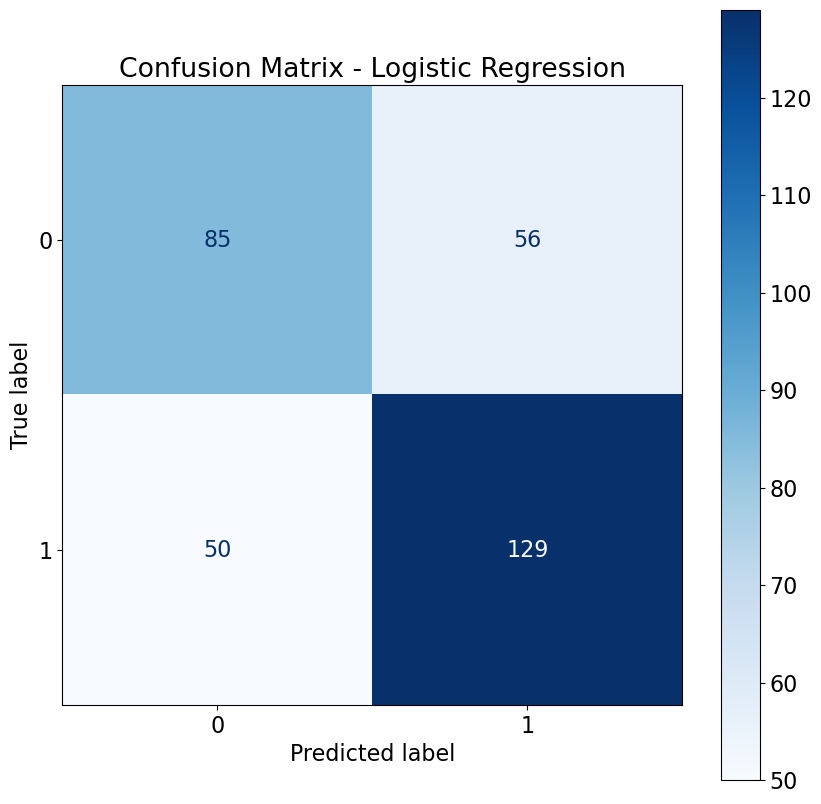

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(classifier,
                                             xtest,
                                             ytest,
                                             display_labels=classifier.classes_,
                                             cmap=plt.cm.Blues,
                                             ax=axes
                                             )
disp.ax_.set_title('Confusion Matrix - Logistic Regression')

### 5.2.2. Métricas de desempeño

Calculamos las diferentes métricas del modelo, como sigue:

In [109]:
from sklearn.metrics import classification_report
target_names = ['Vino malo', 'Vino bueno']
print(classification_report(ytest, ypred, target_names=target_names))

              precision    recall  f1-score   support

   Vino malo       0.63      0.60      0.62       141
  Vino bueno       0.70      0.72      0.71       179

    accuracy                           0.67       320
   macro avg       0.66      0.66      0.66       320
weighted avg       0.67      0.67      0.67       320



Vemos que la precisión del modelo es inferior al 80%, un valor que si bien no es muy alto, es relativamente aceptable.

Finalmente, podemos validar los valores de las probabilidades asignados a cada uno de los elementos del conjunto de prueba:

In [110]:
y_predicted = classifier.predict(xtest)
y_predicted[:5]

array([0, 0, 1, 1, 1])

In [111]:
y_prob = classifier.predict_proba(xtest)
y_prob[:5]

array([[0.66128591, 0.33871409],
       [0.89275208, 0.10724792],
       [0.23172217, 0.76827783],
       [0.43231048, 0.56768952],
       [0.36712865, 0.63287135]])

### 5.2.3. ROC y AUC

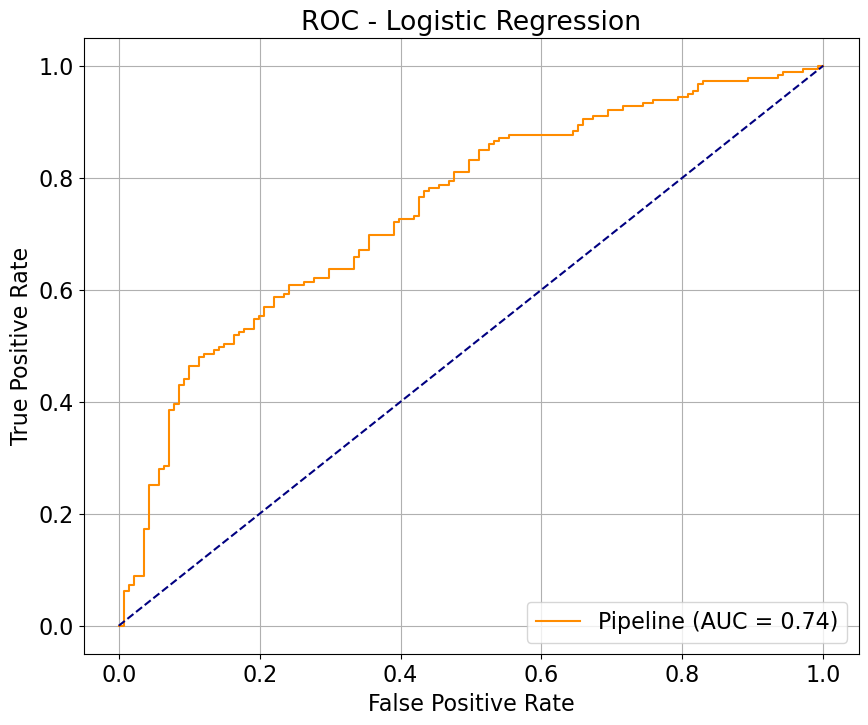

In [114]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()
fig.set_size_inches(10,8)
RocCurveDisplay.from_estimator(classifier, xtest, ytest, ax=ax, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Logistic Regression")
plt.grid()
plt.show()

En general, los siguientes valores se pueden considerar como una guía para interpretar el AUC-ROC:

* 0.5 - 0.7: Aceptable.
* 0.7 - 0.8: Bueno.
* 0.8 - 0.9: Muy bueno.
* 0.9 - 1.0: Excelente.

En este caso, dado que obtuvimos un valor de 0.74, podemos afirmar que nuestro modelo es relativamente bueno.

# 6. Conclusiones

Realizamos un análisis de la calidad del vino tinto, partiendo de las siguientes variables de respuesta:

* y = Calidad del vino, variable numérica entera que toma valores entre 0 y 1. Para este caso, ajustamos un modelo de regresión lineal múltiple.
* y = Vino bueno o malo, variable binaria que toma el valor de 1 si la calidad del vino es mayor o igual a 6 (vino bueno), y 0 en caso contrario. Para este caso, ajustamos un modelo de regresión logística.

En general, se recomienda hacer uso de un modelo de **regresión logística**, pues para este modelo se obtuvo un rendimiento que, si bien no es perfecto, es aceptable, partiendo de métricas como el Accuracy y el AUC. Al ajustar un modelo de regresión lineal múltiple obtuvimos un R cuadrado ajustado muy pobre y, a la hora de validar los modelos, 2 de los 4 supuestos validados no se cumplieron.

De igual forma, se recomienda realizar ajustes en la recopilación de datos o en la especificación del modelo para mejorar su validez y robustez. Así mismo, es importante evaluar otros modelos de mayor poder predictivo como árboles de decisión y métodos de ensamblaje. También se recomienda emplear técnicas exhaustivas e iterativas para seleccionar las variables que más valor agregan al modelo, tales como el método forward o el método backward.